# Telco Churn Analysis
 
 **Introduction :**
 predicting customer churn is critical for telecommunication companies to be able to effectively retain customers.

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Load Data**

In [25]:
df = pd.read_csv('C:/Users/lenovo/Downloads/Internship project/Sample Telco Customer dataset/Telcom.csv')

**Overview of dataset**

In [26]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,1,...,1,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,1,1,...,1,1,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,2,0,...,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7006,4807-IZYOZ,0,0,0,0,51,1,0,0,2,...,2,2,2,2,2,0,0,20.65,1020.75,0
7007,2234-XADUH,0,0,1,1,72,1,1,2,0,...,1,0,1,1,1,1,1,103.20,7362.90,0
7008,4801-JZAZL,0,0,1,1,11,0,0,1,1,...,0,0,0,0,0,1,2,29.60,346.45,0
7009,8361-LTMKD,1,1,1,0,4,1,1,2,0,...,0,0,0,0,0,1,3,74.40,306.60,1


**Checking unique values of each column**






In [27]:
for i in df.columns:
    print(f"Unique {i}'s count: {df[i].nunique()}")
    print(f"{df[i].unique()}\n")

Unique customerID's count: 7011
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

Unique gender's count: 2
[0 1]

Unique SeniorCitizen's count: 2
[0 1]

Unique Partner's count: 2
[1 0]

Unique Dependents's count: 2
[0 1]

Unique Tenure's count: 72
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]

Unique PhoneService's count: 2
[0 1]

Unique MultipleLines's count: 2
[0 1]

Unique InternetService's count: 3
[1 2 0]

Unique OnlineSecurity's count: 3
[0 1 2]

Unique OnlineBackup's count: 3
[1 0 2]

Unique DeviceProtection's count: 3
[0 1 2]

Unique TechSupport's count: 3
[0 1 2]

Unique StreamingTV's count: 3
[0 1 2]

Unique StreamingMovies's count: 3
[0 1 2]

Unique Contract's count: 3
[0 1 2]

Unique PaperlessBilling's count: 2
[1 0]

Unique PaymentMethod's count: 4
[2 3 0 1]

Unique 

# **Data Exploration**

In [38]:
plt.style.use("fivethirtyeight")

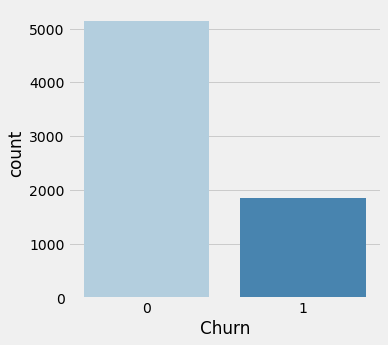

In [39]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(x=df['Churn'], palette="Blues", linewidth=1)
plt.show()

In [78]:


plots = {
    1: [111],
    2: [121, 122],
    3: [131, 132, 133],
    4: [221, 222, 223, 224],
    5: [231, 232, 233, 234, 235],
    6: [231, 232, 233, 234, 235, 236]
}

def boxplot(x, y, df):
    rows = int(str(plots[len(y)][0])[0])
    columns = int(str(plots[len(y)][0])[1])
    plt.figure(figsize=(7 * columns, 7 * rows))
    
    for i, j in enumerate(y):
        plt.subplot(plots[len(y)][i])
        ax = sns.boxplot(x=x, y=j, data=df, palette="Blues", linewidth=1)
        ax.set_title(j)

    plt.show()


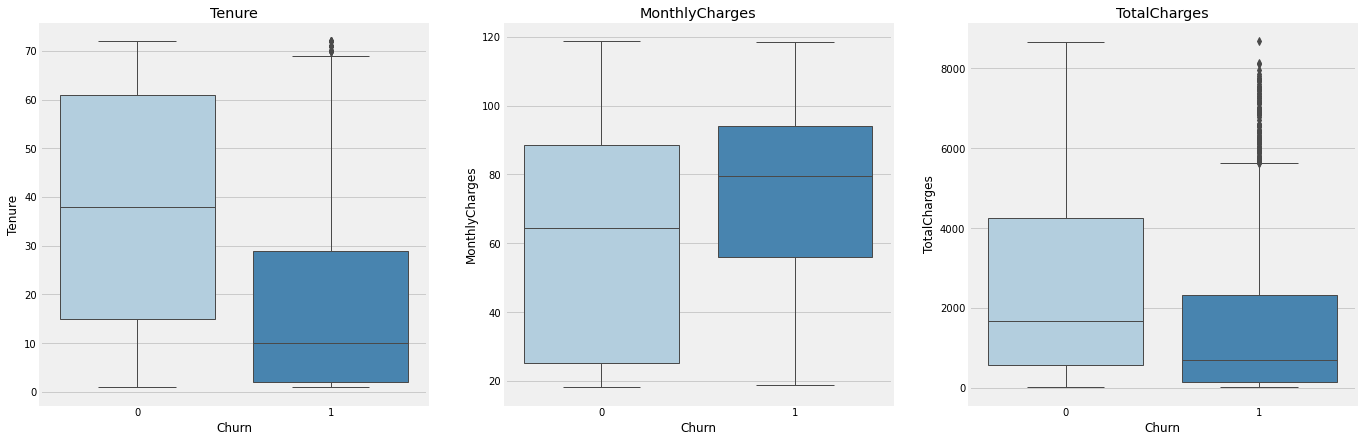

In [79]:
boxplot("Churn", ["Tenure", "MonthlyCharges", "TotalCharges"],df)

In [70]:

def countplot(x, y, df):
    num_plots = len(y)
    rows = num_plots // 2 + num_plots % 2  # Calculate the number of rows
    columns = 2  # Two columns for each row

    plt.figure(figsize=(7 * columns, 7 * rows))

    for i, j in enumerate(y):
        plt.subplot(rows, columns, i + 1)
        ax = sns.countplot(x=j, hue=x, data=df, palette="Blues", alpha=0.8, linewidth=0.4, edgecolor='black')
        ax.set_title(j)

    plt.show()

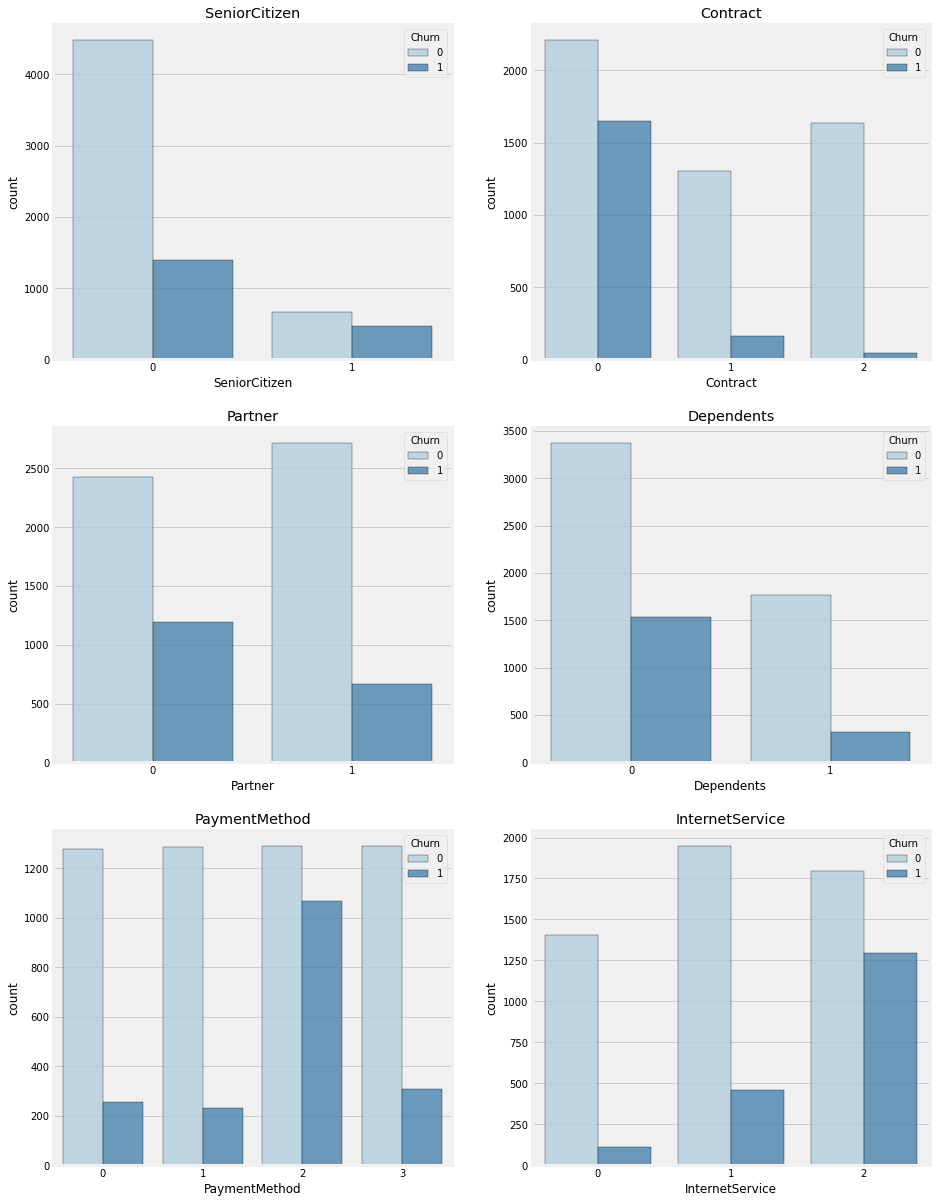

In [71]:
countplot("Churn",['SeniorCitizen', 'Contract', 'Partner', 'Dependents', 'PaymentMethod', 'InternetService'],df)

**SeniorCitizen:** Indicates if the customer is 65 or older: No (0), Yes (1).

**Contract:** Indicates the customer’s current contract type: Month-to-Month (0), One Year (1), Two Year (2).

**Partner:** Service contract is resold by the partner: No (0), Yes (1).

**Dependents:** Indicates if the customer lives with any dependents: No (0), Yes (1).

**PaymentMethod:** Indicates how the customer pays their bill: Bank transfer - automatic (0), Credit card - automatic (1), Electronic cheque (2), Mailed cheque (3)

**InternetService:** Indicates if the customer subscribes to Internet service with the company: No (0), DSL (1), Fiber optic (2).

# Data Analysis and Data Cleaning

 **Summary of dataset**

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7011 entries, 0 to 7010
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7011 non-null   object 
 1   gender            7011 non-null   int64  
 2   SeniorCitizen     7011 non-null   int64  
 3   Partner           7011 non-null   int64  
 4   Dependents        7011 non-null   int64  
 5   Tenure            7011 non-null   int64  
 6   PhoneService      7011 non-null   int64  
 7   MultipleLines     7011 non-null   int64  
 8   InternetService   7011 non-null   int64  
 9   OnlineSecurity    7011 non-null   int64  
 10  OnlineBackup      7011 non-null   int64  
 11  DeviceProtection  7011 non-null   int64  
 12  TechSupport       7011 non-null   int64  
 13  StreamingTV       7011 non-null   int64  
 14  StreamingMovies   7011 non-null   int64  
 15  Contract          7011 non-null   int64  
 16  PaperlessBilling  7011 non-null   int64  


In [29]:
df.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7006,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7007,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7008,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7009,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


 **Drop the customerID column from the dataset**

The CustomerID column is useless to explain whether not the customer will churn.

In [30]:
df.drop(columns='customerID',inplace=True)

In [33]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,0,1,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,2,70.70,151.65,1


 **Unique elements of the paymentMethod column**

In [31]:
df.PaymentMethod.unique()

array([2, 3, 0, 1], dtype=int64)

**Bank transfer  (0), Credit card  (1), Electronic cheque (2), Mailed cheque (3).**

In [32]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7011.000000,7011.000000,7011.000000,7011.000000,7011.000000,7011.000000,7011.000000,7011.000000,7011.000000,7011.00000,7011.000000,7011.000000,7011.000000,7011.000000,7011.00000,7011.000000,7011.000000,7011.000000,7011.000000,7011.000000
mean,0.504636,0.162316,0.482955,0.298959,32.426615,0.903295,0.422051,1.224076,0.719298,0.77735,0.776351,0.722579,0.816574,0.820996,0.68906,0.592212,1.573242,64.798645,2283.620126,0.265868
std,0.500014,0.368767,0.499745,0.457834,24.542847,0.295577,0.493922,0.778727,0.796531,0.77822,0.778575,0.795621,0.763104,0.761254,0.83317,0.491458,1.067423,30.094030,2266.680399,0.441826
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,35.550000,401.400000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.00000,1.000000,2.000000,70.350000,1397.300000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,2.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,2.000000,89.900000,3798.375000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.00000,1.000000,3.000000,118.750000,8684.800000,1.000000


# **In the given data label encoding and one-hot-encoding is satisfied.**

**there for we go for next process**

In [9]:
df ['Churn'].value_counts()

0    5147
1    1864
Name: Churn, dtype: int64

In [10]:
print(df['Tenure'].max())

72


# **Analysis**

In [34]:
corelation = df.corr()

In [72]:
corelation

,gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001760,-0.002110,0.009524,0.005866,-0.008549,-0.009367,-0.010545,-0.003896,-0.001930,0.005595,0.000902,0.001481,-0.000256,0.000721,-0.012334,0.016269,-0.014483,0.000217,-0.008808
SeniorCitizen,-0.001760,1.000000,0.016563,-0.210570,0.015723,0.009227,0.142312,0.259308,-0.210561,-0.152417,-0.156255,-0.222827,-0.129399,-0.120583,-0.141680,0.156687,-0.038541,0.220199,0.102510,0.150981
Partner,-0.002110,0.016563,1.000000,0.451855,0.382425,0.017812,0.142133,0.000835,0.080797,0.086526,0.093592,0.068652,0.079707,0.075786,0.294590,-0.013493,-0.156976,0.097757,0.319383,-0.150037
Dependents,0.009524,-0.210570,0.451855,1.000000,0.164455,-0.001377,-0.024362,-0.177918,0.188683,0.161222,0.154783,0.179157,0.139014,0.124916,0.241111,-0.110491,-0.043060,-0.112404,0.065354,-0.163793
Tenure,0.005866,0.015723,0.382425,0.164455,1.000000,0.007045,0.332251,0.031041,0.147487,0.180403,0.180776,0.147409,0.138227,0.142593,0.677242,0.005295,-0.370064,0.246746,0.825846,-0.354279
PhoneService,-0.008549,0.009227,0.017812,-0.001377,0.007045,1.000000,0.279607,0.094157,0.125232,0.150107,0.139081,0.123692,0.172430,0.165240,0.003002,0.016223,-0.005128,0.248316,0.112637,0.011206
MultipleLines,-0.009367,0.142312,0.142133,-0.024362,0.332251,0.279607,1.000000,0.344536,-0.162226,-0.099157,-0.100241,-0.160127,-0.062162,-0.061586,0.108179,0.163752,-0.171605,0.490363,0.468628,0.040069
InternetService,-0.010545,0.259308,0.000835,-0.177918,0.031041,0.094157,0.344536,1.000000,-0.764694,-0.685752,-0.682246,-0.760309,-0.616666,-0.619354,-0.288360,0.377826,-0.119199,0.905435,0.428088,0.316485
OnlineSecurity,-0.003896,-0.210561,0.080797,0.188683,0.147487,0.125232,-0.162226,-0.764694,1.000000,0.751340,0.748475,0.791230,0.701729,0.704775,0.389297,-0.334357,0.044989,-0.620567,-0.153315,-0.332698
OnlineBackup,-0.001930,-0.152417,0.086526,0.161222,0.180403,0.150107,-0.099157,-0.685752,0.751340,1.000000,0.740194,0.753841,0.720079,0.716266,0.350176,-0.261298,0.028306,-0.537716,-0.085496,-0.290827


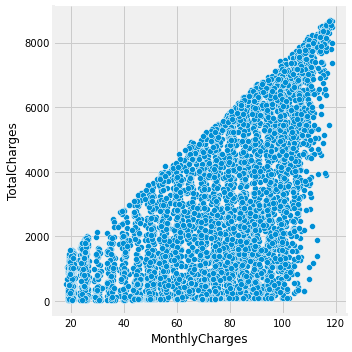

In [73]:
sns.relplot(data=df, x='MonthlyCharges', y='TotalCharges')
plt.show()
 

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

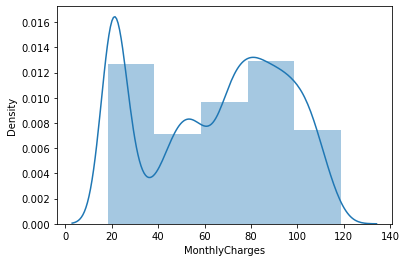

In [36]:
sns.distplot(df['MonthlyCharges'],bins=5)

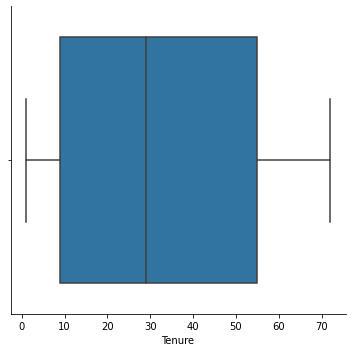

In [37]:
sns.catplot(x='Tenure',kind='box',data = df)

# Splitting the data into Training and Testing Sets

In [36]:
# select independent variables
x = df.drop(columns = 'Churn')
 
# select depentent variables    
y = df.loc[:,'Churn']

print(x.columns)
print(y.name)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')
Churn


In [23]:
from sklearn.model_selection import train_test_split 

 **testing and training**

In [24]:
x_train,x_test, y_train,y_test = train_test_split(x, y, test_size = 0.25, random_state=40, shuffle=True)

# **Assessing Multiple Algorithms**

In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

**Create Models**

In [34]:
def create_models(seed=2):
    
    models = []
    models.append(('k_nearest_neighbors', KNeighborsClassifier()))
    models.append(('logistic_regression', LogisticRegression(random_state=seed)))
    models.append(('support_vector_machines',SVC(random_state=seed)))
    models.append(('random_forest',RandomForestClassifier(random_state=seed)))
    models.append(('gradient_boosting', GradientBoostingClassifier(random_state=seed)))

    return models

#create a list with all the algorithms
models = create_models()

**Test the accuracy of the each model using default hyperparameters**

In [38]:
results = []
names = []
Scoring = 'accuracy'
for name, model in models:
    
    #fit the models with the traning data
    model.fit(x_train, y_train).predict(x_test)
    
    #make prediction with testing data
    predictions = model.predict(x_test)
    
    #calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    
    #append the model nae and the accuracy to the lists
    results.append(accuracy)
    names.append(name)
    
    #print classifier accuracy
    print('Classifier: {},Accuracy: {})'.format(name,accuracy))

Classifier: k_nearest_neighbors,Accuracy: 0.7604107244723332)
Classifier: logistic_regression,Accuracy: 0.8054763262977752)


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classifier: support_vector_machines,Accuracy: 0.7450085567598402)
Classifier: random_forest,Accuracy: 0.7900741585852824)
Classifier: gradient_boosting,Accuracy: 0.8106103822019395)


# Conclution

After testing with several models Gradient Boosting algorithms give 80% accuracy rate.

**gradient boosting**

Gradient Boosting is a functional gradient algorithm that repeatedly selects a function that leads in the direction of a weak hypothesis or negative gradient so that it can minimize a loss function. Gradient boosting classifier combines several weak learning models to produce a powerful predicting model.